## Dependencies

In [32]:
import cv2 as cv
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

## Data Load & Split

In [26]:
# Load the training and test set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize pixel values to range [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.

# Reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))

# # Print the shapes of the datasets
# print('Training set shape:', x_train.shape, y_train.shape)
# print('Validation set shape:', x_val.shape, y_val.shape)
# print('Testing set shape:', x_test.shape, y_test.shape)

## CNN Models

### Baseline

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

### Variant 1: Batch Normalization

In [ ]:
variant1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

### Variant 2: More Filters

In [ ]:
variant2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

### Variant 3: Dropout

In [40]:
variant3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

### Variant 4: Extra Convolution Layer

In [ ]:
variant4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

## Training & Testing

In [41]:
# Compile the model
model = variant3
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4362 - accuracy: 0.8424 - val_loss: 0.3314 - val_accuracy: 0.8783
Epoch 2/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2946 - accuracy: 0.8929 - val_loss: 0.2581 - val_accuracy: 0.9044
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2514 - accuracy: 0.9072 - val_loss: 0.2442 - val_accuracy: 0.9097
Epoch 4/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2182 - accuracy: 0.9191 - val_loss: 0.2338 - val_accuracy: 0.9140
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1977 - accuracy: 0.9264 - val_loss: 0.2143 - val_accuracy: 0.9210
Epoch 6/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1770 - accuracy: 0.9325 - val_loss: 0.2258 - val_accuracy: 0.9182
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1601 - accuracy: 0.9399 - val_loss: 0.2086 -

## Plotting

In [43]:
# Plot testing and validation accuracy values
def plot_acc(history):
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Validation', 'Training'], loc='upper left')
    plt.show()

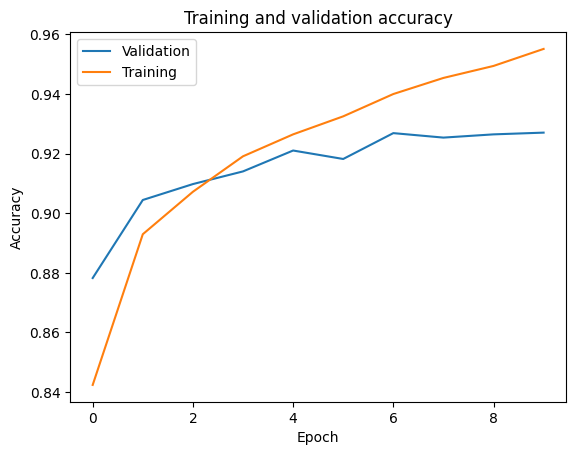

In [44]:
# Variant 3
plot_acc(history)